In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Car_Insurance_Claim.csv", index_col="Unnamed: 0")
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [126]:
df = df.replace({"nan": np.nan, "NaN": np.nan, "none": np.nan})
df.isnull().sum()

ID                        0
AGE                     100
GENDER                   99
RACE                     99
DRIVING_EXPERIENCE      100
EDUCATION              1996
INCOME                    0
CREDIT_SCORE           1072
VEHICLE_OWNERSHIP       100
VEHICLE_YEAR            100
MARRIED                  98
CHILDREN                100
POSTAL_CODE             100
ANNUAL_MILEAGE         1050
VEHICLE_TYPE             99
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
dtype: int64

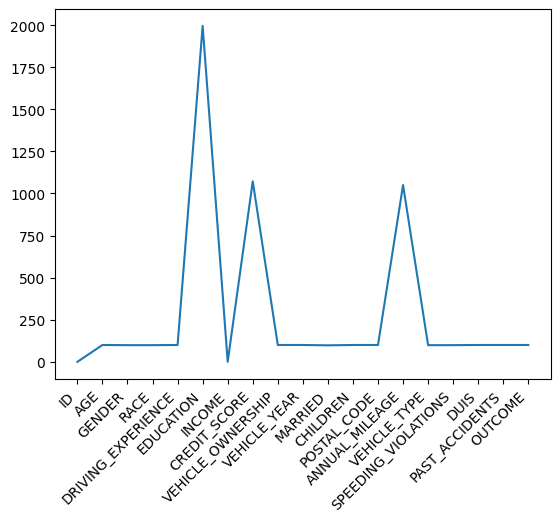

In [127]:
fig, ax = plt.subplots()
ax.plot(df.isnull().sum())
plt.xticks(rotation=45, ha="right")
plt.show()

In [128]:
df["CREDIT_SCORE"] = df["CREDIT_SCORE"].replace("none", np.nan)
df["CREDIT_SCORE"] = pd.to_numeric(df["CREDIT_SCORE"])
df["CREDIT_SCORE"] = df["CREDIT_SCORE"].fillna(np.median(df["CREDIT_SCORE"].dropna()))

df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].replace("none", np.nan)
df["ANNUAL_MILEAGE"] = pd.to_numeric(df["ANNUAL_MILEAGE"])
df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].fillna(np.median(df["ANNUAL_MILEAGE"].dropna()))


In [129]:
df.isnull().sum()

ID                        0
AGE                     100
GENDER                   99
RACE                     99
DRIVING_EXPERIENCE      100
EDUCATION              1996
INCOME                    0
CREDIT_SCORE              0
VEHICLE_OWNERSHIP       100
VEHICLE_YEAR            100
MARRIED                  98
CHILDREN                100
POSTAL_CODE             100
ANNUAL_MILEAGE            0
VEHICLE_TYPE             99
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
dtype: int64

In [130]:
df["AGE"] = df["AGE"].fillna(df["AGE"].value_counts().index[0])
df["GENDER"] = df["GENDER"].fillna(df["GENDER"].value_counts().index[0])
df["RACE"] = df["RACE"].fillna(df["RACE"].value_counts().index[0])
df["DRIVING_EXPERIENCE"] = df["DRIVING_EXPERIENCE"].fillna(df["DRIVING_EXPERIENCE"].value_counts().index[0])
df["EDUCATION"] = df["EDUCATION"].fillna(df["EDUCATION"].value_counts().index[0])
df["VEHICLE_OWNERSHIP"] = df["VEHICLE_OWNERSHIP"].fillna(df["VEHICLE_OWNERSHIP"].value_counts().index[0])
df["VEHICLE_YEAR"] = df["VEHICLE_YEAR"].fillna(df["VEHICLE_YEAR"].value_counts().index[0])
df["MARRIED"] = df["MARRIED"].fillna(df["MARRIED"].value_counts().index[0])
df["CHILDREN"] = df["CHILDREN"].fillna(df["CHILDREN"].value_counts().index[0])
df["POSTAL_CODE"] = pd.to_numeric(df["POSTAL_CODE"])
df["POSTAL_CODE"] = df["POSTAL_CODE"].fillna(df["POSTAL_CODE"].value_counts().index[0])
df["VEHICLE_TYPE"] = df["VEHICLE_TYPE"].fillna(df["VEHICLE_TYPE"].value_counts().index[0])
df["SPEEDING_VIOLATIONS"] = df["SPEEDING_VIOLATIONS"].fillna(df["SPEEDING_VIOLATIONS"].value_counts().index[0])
df["DUIS"] = df["DUIS"].fillna(df["DUIS"].value_counts().index[0])
df["PAST_ACCIDENTS"] = df["PAST_ACCIDENTS"].fillna(df["PAST_ACCIDENTS"].value_counts().index[0])
df = df.dropna()
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [131]:
df["VEHICLE_OWNERSHIP"] = pd.to_numeric(df["VEHICLE_OWNERSHIP"])
df["MARRIED"] = pd.to_numeric(df["MARRIED"])
df["CHILDREN"] = pd.to_numeric(df["CHILDREN"])
df["SPEEDING_VIOLATIONS"] = pd.to_numeric(df["SPEEDING_VIOLATIONS"])
df["DUIS"] = pd.to_numeric(df["DUIS"])
df["PAST_ACCIDENTS"] = pd.to_numeric(df["PAST_ACCIDENTS"])
df["OUTCOME"] = pd.to_numeric(df["OUTCOME"])
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238.0,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,high school,poverty,0.357757,0.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238.0,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765.0,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,high school,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,high school,middle class,0.522231,1.0,after 2015,0.0,1.0,32765.0,12000.0,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238.0,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238.0,13000.0,sedan,2,0,1,1.0


In [132]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,500659.299091,0.516654,0.700505,0.492525,0.690909,19734.633737,11735.454545,1.464646,0.236162,1.047172,0.313636
std,290006.851637,0.130109,0.458060,0.499969,0.462142,18836.772371,2671.421744,2.231673,0.551962,1.649968,0.463994
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,250065.250000,0.432361,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,501481.000000,0.524905,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,754233.000000,0.606612,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.000000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.000000,15.000000,1.000000


In [133]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [134]:
outliers = find_outliers_IQR(df['ID'])
a = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['CREDIT_SCORE'])
b = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['VEHICLE_OWNERSHIP'])
c = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['MARRIED'])
d = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['CHILDREN'])
e = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['POSTAL_CODE'])
f = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['ANNUAL_MILEAGE'])
g = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['SPEEDING_VIOLATIONS'])
h = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['DUIS'])
i = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['PAST_ACCIDENTS'])
j = outliers.value_counts().sum()
outliers = find_outliers_IQR(df['OUTCOME'])
k = outliers.value_counts().sum()


In [135]:
outliers_in_customer_policy_details = pd.DataFrame([a,b,c,d,e,f,g,h,i,j,k],['ID','CREDIT_SCORE','VEHICLE_OWNERSHIP','MARRIED','CHILDREN','POSTAL_CODE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS','OUTCOME'],columns = ['num of outliers'])

In [136]:
outliers_in_customer_policy_details

,num of outliers
ID,0
CREDIT_SCORE,66
VEHICLE_OWNERSHIP,0
MARRIED,0
CHILDREN,0
POSTAL_CODE,474
ANNUAL_MILEAGE,270
SPEEDING_VIOLATIONS,573
DUIS,1841
PAST_ACCIDENTS,280


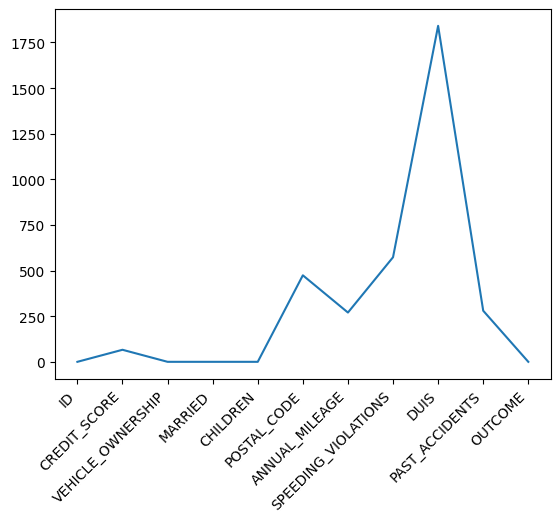

In [137]:
fig, ax = plt.subplots()
ax.plot(outliers_in_customer_policy_details)
plt.xticks(rotation=45, ha="right")
plt.show()

In [138]:
df['GENDER'] = df['GENDER'].str.strip()
df['GENDER'] = df['GENDER'].str.upper()
df['GENDER']

0       FEMALE
1         MALE
2       FEMALE
3         MALE
4         MALE
         ...  
9995    FEMALE
9996    FEMALE
9997      MALE
9998    FEMALE
9999    FEMALE
Name: GENDER, Length: 9900, dtype: object

In [139]:
Gender_dummy = pd.get_dummies(df['GENDER'])
Gender_dummy

,FEMALE,MALE
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
9995,True,False
9996,True,False
9997,False,True
9998,True,False


In [140]:
vehicle_age_dummy = pd.get_dummies(df['VEHICLE_YEAR'])
vehicle_age_dummy

,after 2015,before 2015
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
9995,False,True
9996,True,False
9997,False,True
9998,False,True


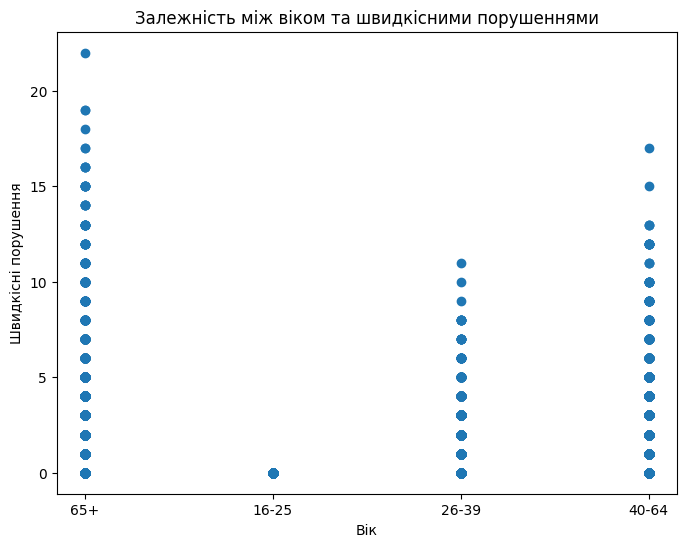

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AGE'], df['SPEEDING_VIOLATIONS'])
plt.title('Залежність між віком та швидкісними порушеннями')
plt.xlabel('Вік')
plt.ylabel('Швидкісні порушення')
plt.show()

<Figure size 800x600 with 0 Axes>

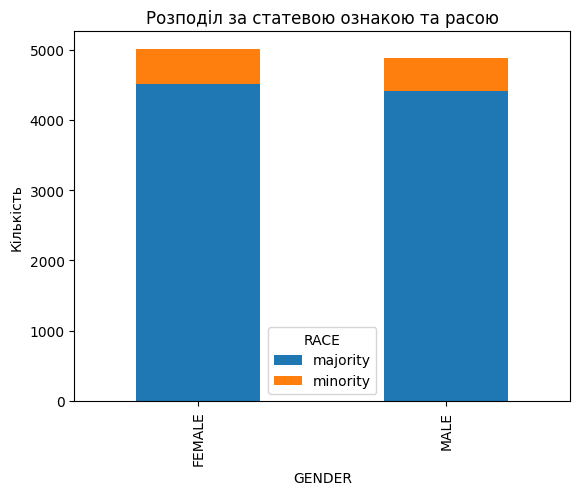

In [142]:
plt.figure(figsize=(8, 6))
df.groupby(['GENDER', 'RACE']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Розподіл за статевою ознакою та расою')
plt.ylabel('Кількість')
plt.show()

<Figure size 800x600 with 0 Axes>

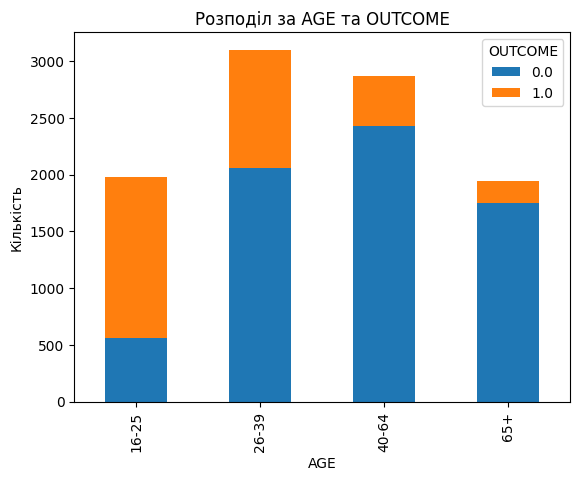

<Figure size 800x600 with 0 Axes>

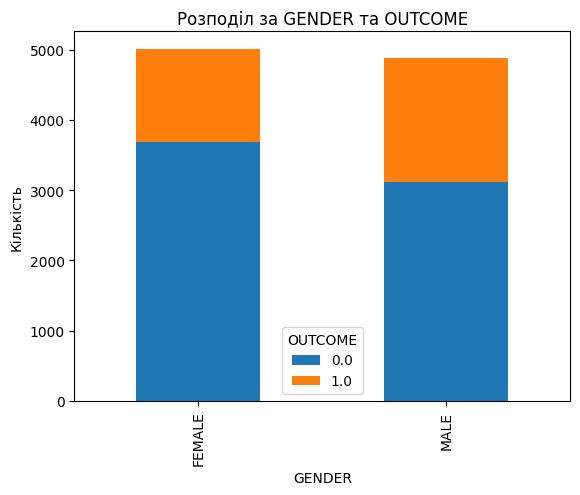

<Figure size 800x600 with 0 Axes>

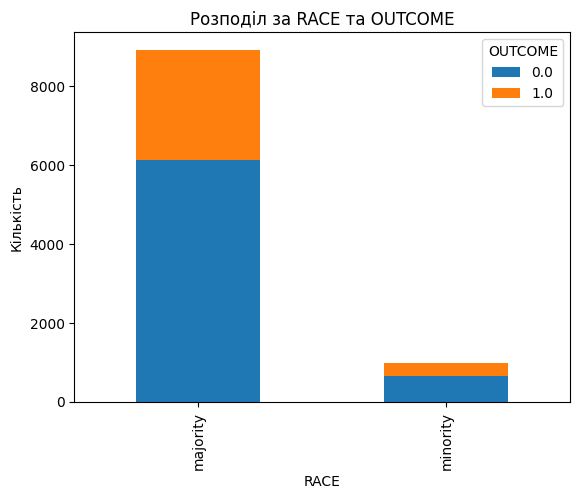

<Figure size 800x600 with 0 Axes>

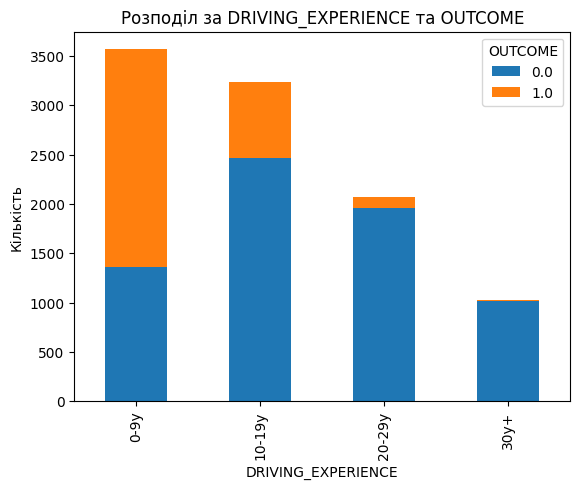

<Figure size 800x600 with 0 Axes>

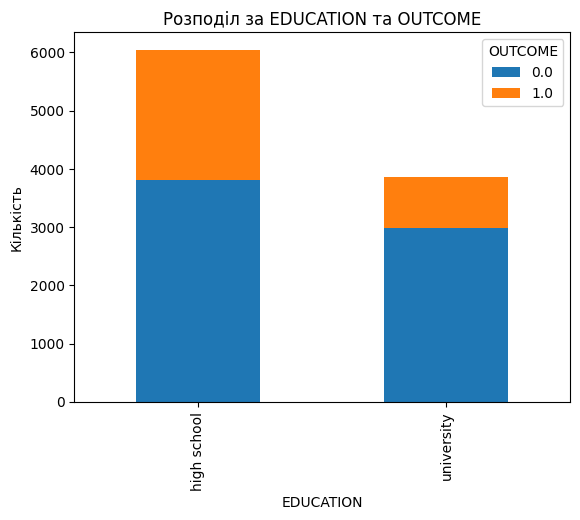

<Figure size 800x600 with 0 Axes>

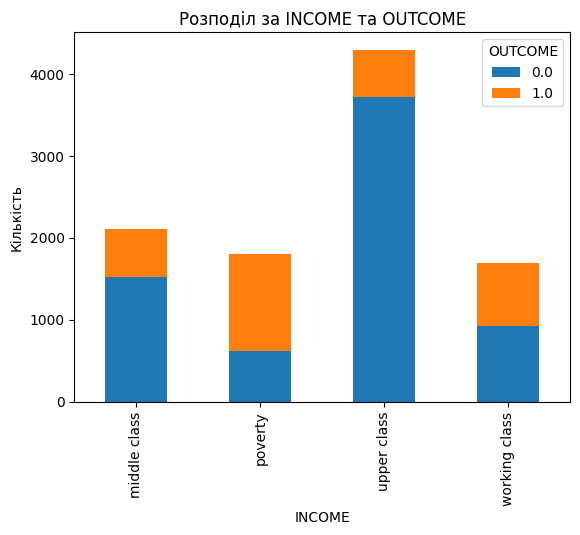

<Figure size 800x600 with 0 Axes>

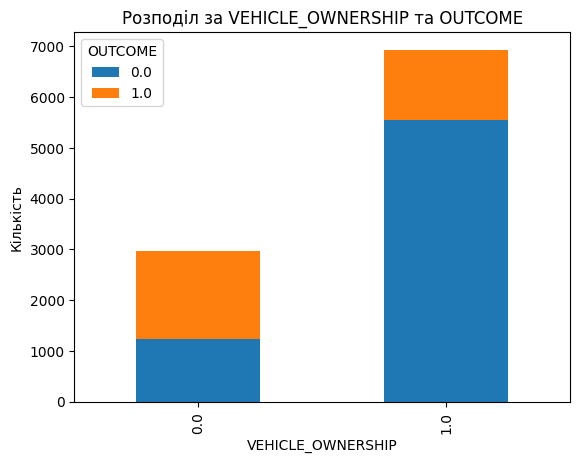

<Figure size 800x600 with 0 Axes>

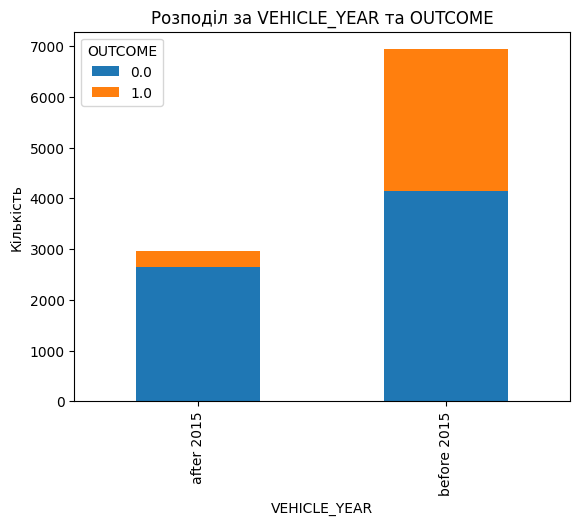

<Figure size 800x600 with 0 Axes>

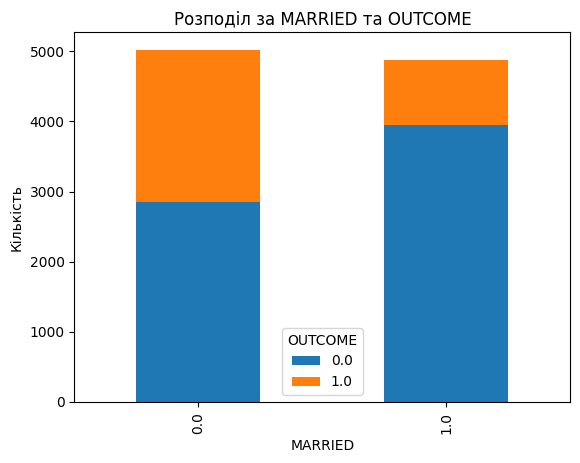

<Figure size 800x600 with 0 Axes>

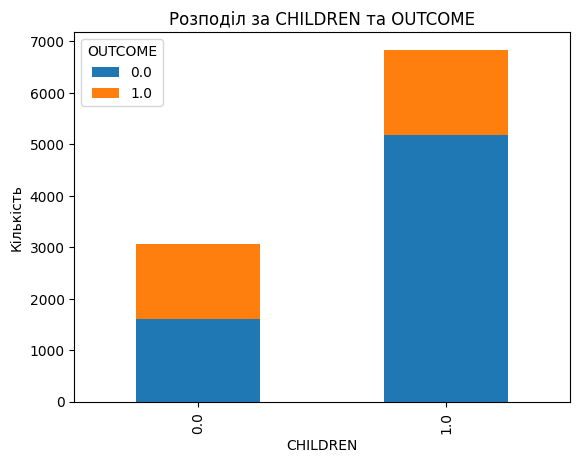

<Figure size 800x600 with 0 Axes>

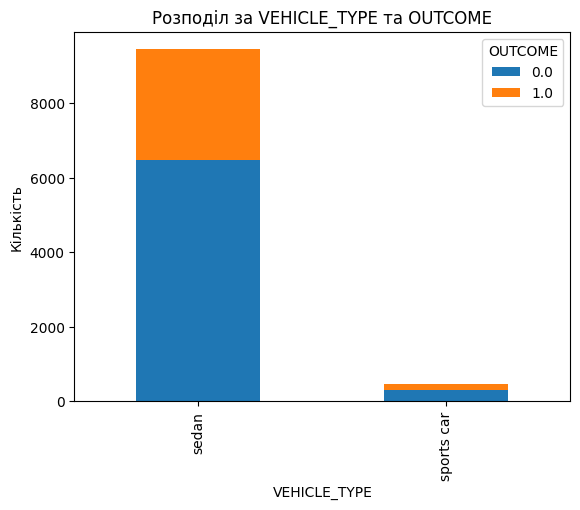

<Figure size 800x600 with 0 Axes>

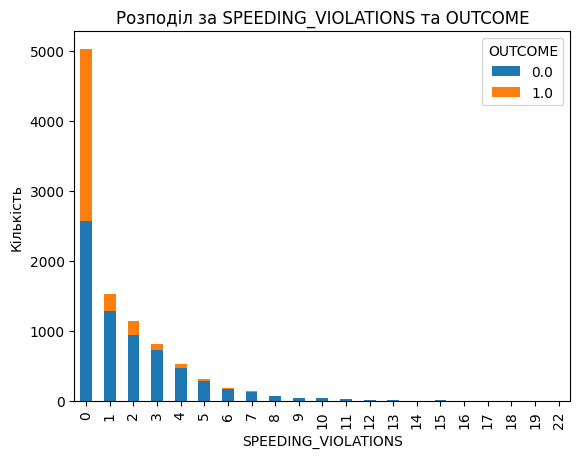

<Figure size 800x600 with 0 Axes>

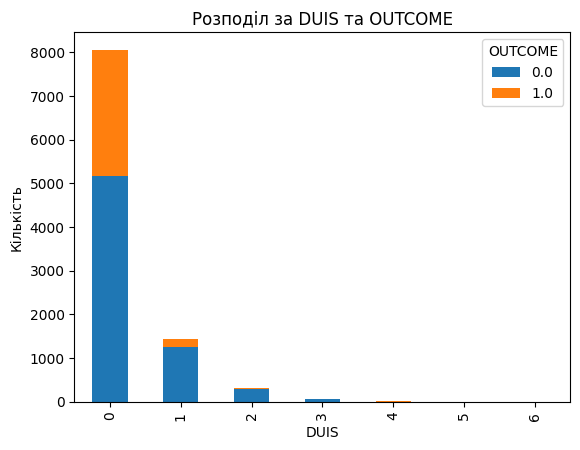

<Figure size 800x600 with 0 Axes>

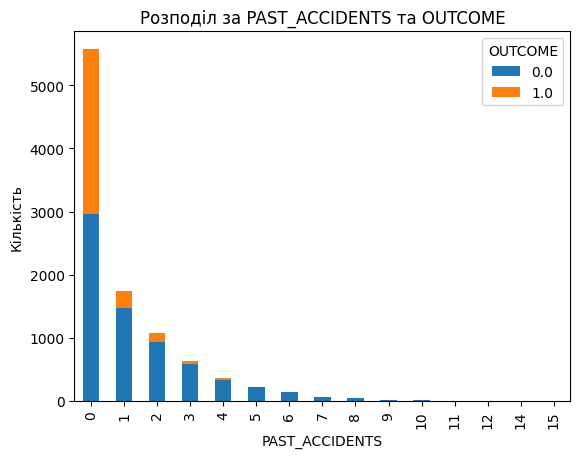

<Figure size 800x600 with 0 Axes>

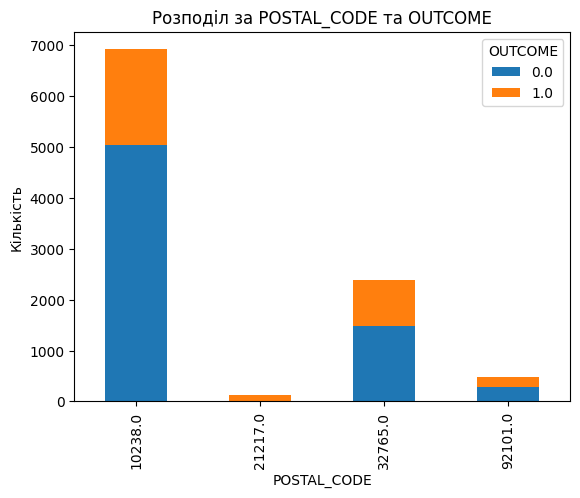

<Figure size 800x600 with 0 Axes>

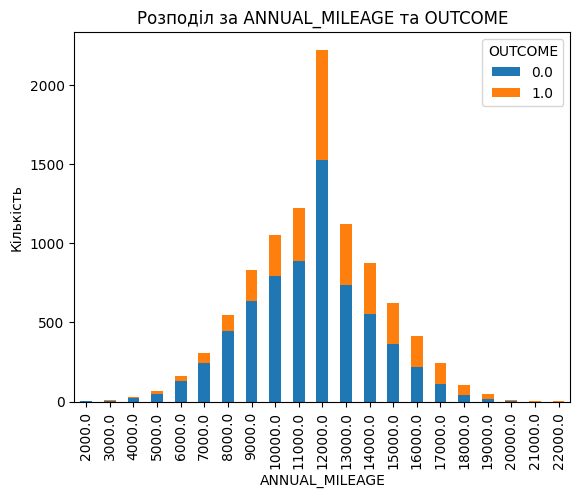

In [143]:
categorical_columns = ['AGE', 'GENDER', 'RACE','DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_OWNERSHIP','VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'VEHICLE_TYPE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS', 'POSTAL_CODE', 'ANNUAL_MILEAGE']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df.groupby([column, 'OUTCOME']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Розподіл за {column} та OUTCOME')
    plt.ylabel('Кількість')
    plt.show()

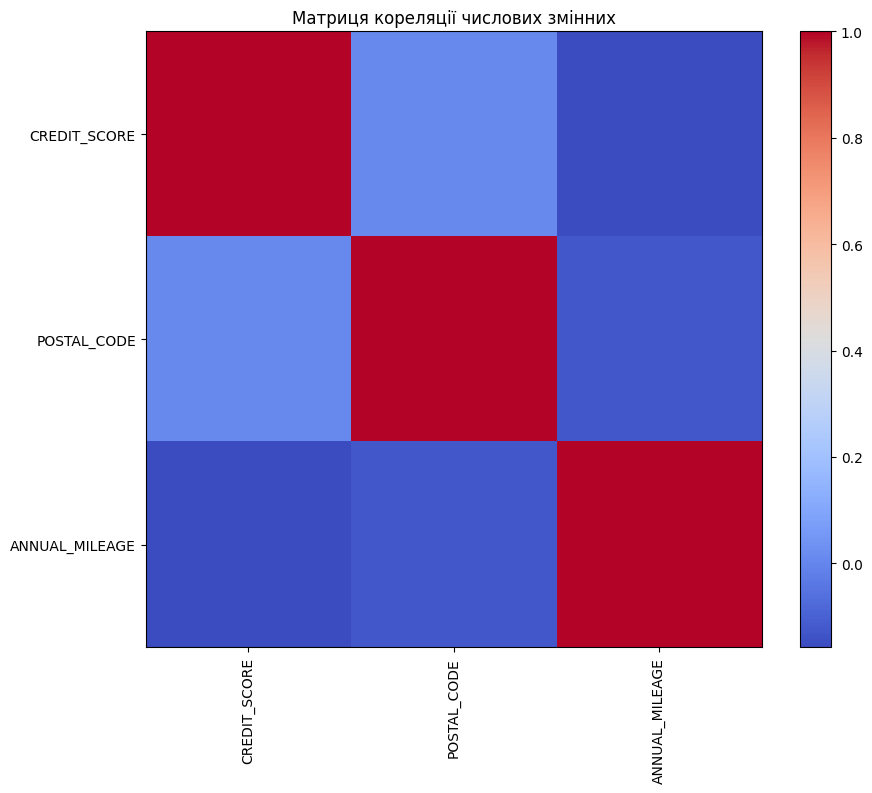

In [144]:
numeric_columns = ['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
plt.title('Матриця кореляції числових змінних')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(numeric_columns))]
plt.xticks(tick_marks, numeric_columns, rotation='vertical')
plt.yticks(tick_marks, numeric_columns)
plt.show()

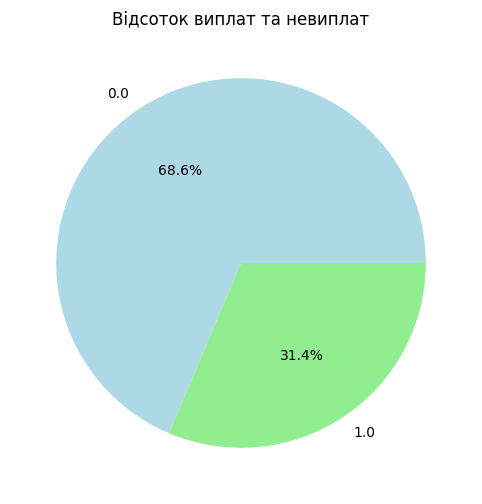

In [145]:
plt.figure(figsize=(8, 6))
df.groupby('OUTCOME').size().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Відсоток виплат та невиплат')
plt.show()